In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

%matplotlib inline

In [69]:
X, y = make_classification(n_samples=2000, n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=2)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<Axes: xlabel='0', ylabel='1'>

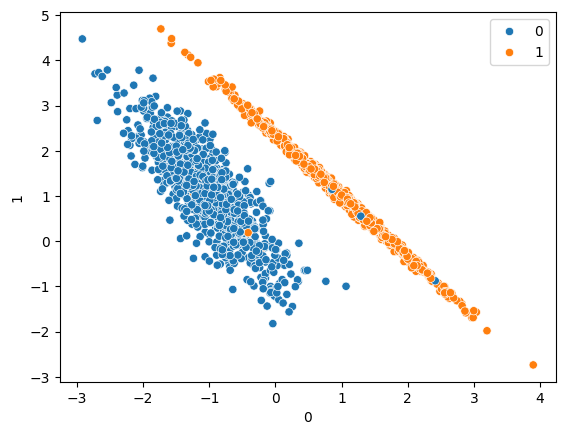

In [71]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [72]:
from sklearn.svm import SVC

In [73]:
svc = SVC(kernel='linear')

In [74]:
svc.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [75]:
y_pred = svc.predict(X_test)

In [76]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [77]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       256
           1       1.00      1.00      1.00       244

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

0.996
[[255   1]
 [  1 243]]


In [78]:
X, y = make_classification(n_samples=2000, n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=2, random_state=2)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<Axes: xlabel='0', ylabel='1'>

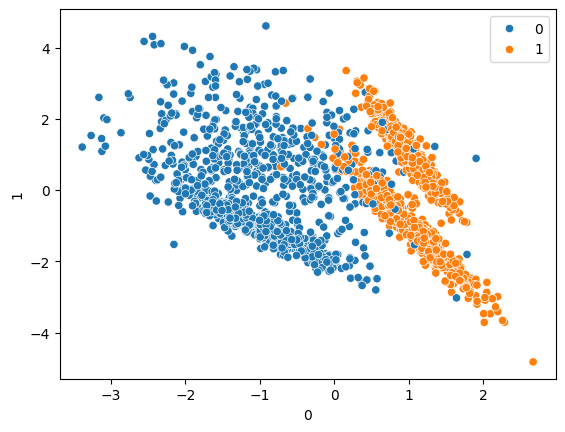

In [80]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [81]:
svc.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [82]:
y_pred = svc.predict(X_test)

In [83]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       244
           1       0.95      0.97      0.96       256

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500

0.958
[[230  14]
 [  7 249]]


In [84]:
rbf = SVC(kernel='rbf')

In [85]:
rbf.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [86]:
y_pred1 = rbf.predict(X_test)

In [87]:
print(classification_report(y_test, y_pred1))
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       244
           1       0.95      0.98      0.97       256

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500

0.964
[[231  13]
 [  5 251]]


In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
param_grid = {'C': [0.1, 1, 10, 100, 500],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [90]:
grid = GridSearchCV(SVC(), param_grid=param_grid, refit=True, verbose=1)

In [91]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf', 'linear', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [92]:
y_pred2 = grid.predict(X_test)

In [93]:
print(classification_report(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       244
           1       0.95      0.98      0.97       256

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500

0.964
[[232  12]
 [  6 250]]


In [94]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [95]:
x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y = np.hstack([y, -y])
x = np.hstack([x, -x])

In [96]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1, -y1])
x1 = np.hstack([x1, -x1])

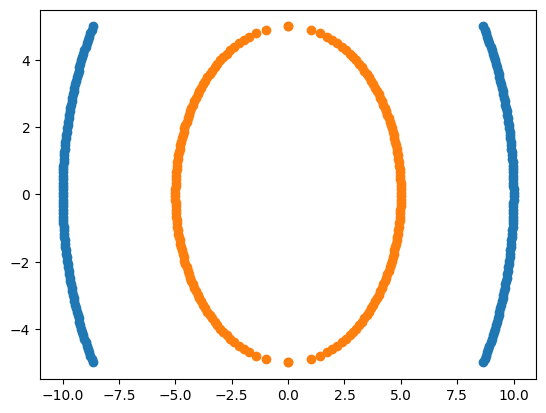

In [97]:
plt.scatter(y, x)
plt.scatter(y1, x1)

In [98]:
df1 = pd.DataFrame(np.vstack([y,x]).T, columns=['X1', 'X2'])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1,x1]).T, columns=['X1', 'X2'])
df2['Y'] = 1

In [99]:
df = pd.concat([df1, df2])

In [100]:
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [101]:
df.describe()

,X1,X2,Y
count,400.000000,400.000000,400.000000
mean,0.000000,0.000000,0.500000
std,7.357557,2.919416,0.500626
min,-9.999872,-5.000000,0.000000
25%,-5.914872,-2.500000,0.000000
50%,0.000000,0.000000,0.500000
75%,5.914872,2.500000,1.000000
max,9.999872,5.000000,1.000000


In [102]:
X = df.iloc[:, :2]

In [117]:
y = df.iloc[:, 2].values  # Use .values to get a 1D numpy array

In [118]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [119]:
X

,X1,X2
0,8.660254,-5.00000
1,8.717792,-4.89899
2,8.773790,-4.79798
3,8.828277,-4.69697
4,8.881281,-4.59596
...,...,...
195,-1.969049,-4.59596
196,-1.714198,-4.69697
197,-1.406908,-4.79798
198,-0.999949,-4.89899


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Polynomial Kernel

In [121]:
df['X1_Square'] = df['X1'] ** 2
df['X2_Square'] = df['X2'] ** 2
df['X1_X2'] = df['X1'] * df['X2']

df.head()

,X1,X2,Y,X1_Square,X2_Square,X1_X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [122]:
import plotly.express as px

fig = px.scatter_3d(df, x='X1', y='X2', z='X1_X2', color='Y')
fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'X1=%{x}<br>X2=%{y}<br>X1_X2=%{z}<br>Y=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': {'bdata': ('AAAAAAAAAAAAAAAAAAAAAAAAAAAAAA' ... 'EBAQEBAQEBAQEBAQEBAQEBAQEBAQ=='),
                                   'dtype': 'i1'},
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'scene': 'scene',
              'showlegend': False,
              'type': 'scatter3d',
              'x': {'bdata': ('6y830QxSIUBFUglwgm8hQOSR0jEujC' ... 'LdsYL2v/sYuQKV/++/AAAAAAAAAIA='),
                    'dtype': 'f8'},
              'y': {'bdata': ('AAAAAAAAFMBDYt7OkJgTwIbEvJ0hMR' ... 'ydITETwERi3s6QmBPAAAAAAAAAFMA='),
                    'dtype': 'f8'},
              'z': {'bdata': ('5vuEBZCmRcA8YDcJrFpFwNB0wAZZDE' ... 'vDUgAbQOsQZUpPmBNAAAAAAAAAAAA='),
                    'dtype': 'f8'}}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'Y'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'scene': {'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                         'xaxis': {'title': {'text': 'X1'}},
                         'yaxis': {'title': {'text': 'X2'}},
                         'zaxis': {'title': {'text': 'X1_X2'}}},
               'template': '...'}
})

In [124]:
fig = px.scatter_3d(df, x='X1_Square', y='X2_Square', z='X1_X2', color='Y')
fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('X1_Square=%{x}<br>X2_Square=%{' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': {'bdata': ('AAAAAAAAAAAAAAAAAAAAAAAAAAAAAA' ... 'EBAQEBAQEBAQEBAQEBAQEBAQEBAQ=='),
                                   'dtype': 'i1'},
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'scene': 'scene',
              'showlegend': False,
              'type': 'scatter3d',
              'x': {'bdata': ('AQAAAADAUkDQrw1U/v9SQBS6zFKuPl' ... '6zlKv/P8Dn1wYq/+8/AAAAAAAAAAA='),
                    'dtype': 'f8'},
              'y': {'bdata': ('AAAAAAAAOUDAQMmvBgA4QLAXzbRGBT' ... '20RgU3QMJAya8GADhAAAAAAAAAOUA='),
                    'dtype': 'f8'},
              'z': {'bdata': ('5vuEBZCmRcA8YDcJrFpFwNB0wAZZDE' ... 'vDUgAbQOsQZUpPmBNAAAAAAAAAAAA='),
                    'dtype': 'f8'}}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'Y'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'scene': {'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                         'xaxis': {'title': {'text': 'X1_Square'}},
                         'yaxis': {'title': {'text': 'X2_Square'}},
                         'zaxis': {'title': {'text': 'X1_X2'}}},
               'template': '...'}
})

In [123]:
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)
y_pred_new = classifier.predict(X_test)
score = accuracy_score(y_test, y_pred_new)
print(score)

0.51


In [116]:
y_train

,Y
47,1
110,0
16,0
66,0
153,0
...,...
71,0
106,0
70,1
148,1


In [125]:
classifier2 = SVC(kernel='poly')
classifier2.fit(X_train, y_train)
y_pred_new = classifier2.predict(X_test)
accuracy_score(y_test, y_pred_new)

0.69

In [126]:
classifier3 = SVC(kernel='rbf')
classifier3.fit(X_train, y_train)
y_pred_new = classifier3.predict(X_test)
accuracy_score(y_test, y_pred_new)

1.0

## Support Vector Regression Implementation

In [127]:
df = sns.load_dataset('tips')

In [131]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [133]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [134]:
X = df[['tip', 'sex', 'smoker', 'day', 'time', 'size']]
y = df['total_bill']

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Feature encoding - One hot encoding and label encoding
#### It should be done after train test split so as to prevent data leakage

In [136]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()

In [137]:
X_train['sex'] = le1.fit_transform(X_train['sex'])
X_train['smoker'] = le2.fit_transform(X_train['smoker'])
X_train['time'] = le3.fit_transform(X_train['time'])

In [138]:
X_test['sex'] = le1.transform(X_test['sex'])
X_test['smoker'] = le2.transform(X_test['smoker'])
X_test['time'] = le3.transform(X_test['time'])

In [139]:
X_test

,tip,sex,smoker,day,time,size
24,3.18,1,0,Sat,0,2
6,2.00,1,0,Sun,0,2
153,2.00,1,0,Sun,0,4
211,5.16,1,1,Sat,0,4
198,2.00,0,1,Thur,1,2
...,...,...,...,...,...,...
172,5.15,1,1,Sun,0,2
242,1.75,1,0,Sat,0,2
152,2.74,1,0,Sun,0,3
231,3.00,1,1,Sat,0,3


In [140]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [142]:
ct = ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first'), [3])], remainder='passthrough')

In [144]:
X_train = ct.fit_transform(X_train)

In [145]:
X_test = ct.fit_transform(X_test)

In [146]:
from sklearn.svm import SVR

svr = SVR()

In [147]:
svr.fit(X_train, y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [148]:
y_pred4 = svr.predict(X_test)